<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots","Turing","FillArrays","StatsPlots", "InverseFunctions","MTH229"])

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
import SpecialFunctions
import Plots
using Distributions, Plots, Random, Statistics, Turing, FillArrays, StatsPlots,InverseFunctions, MTH229,SpecialFunctions

In [3]:
function sample_gaussian(μ, σ, n)
Q=zeros(n)
    for i in 1:n
        p=rand()
        Q[i]= σ.*(√2 .* erfinv(2 .*p .-1)).+ μ
    end
   return Q
end
    

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [4]:
data=sample_gaussian(-1,2,1000)

1000-element Vector{Float64}:
  1.0467272074963332
 -2.5795928446070393
 -0.05331155588558767
 -0.5082892629009659
  1.0572466530027103
 -2.680398097331773
  3.0618462935524837
  1.5305345186038068
 -1.7046046985724792
 -4.12864456436517
 -1.8463133024246972
 -3.023438046572933
  1.509258035297877
  ⋮
 -4.024634331871381
  1.3279547193909669
  1.2013350469328952
 -0.38195240185523105
  1.8017307651539034
 -5.372639871322624
 -1.5544123039130175
 -0.5595789094164856
 -2.595793976733778
  1.7438286321718843
  0.5240450779245387
 -0.4765570805342517

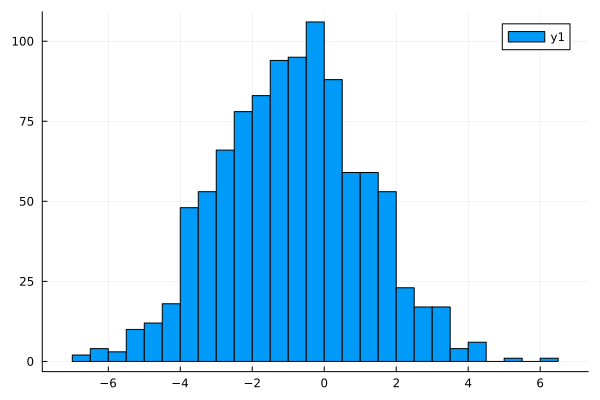

In [5]:
histogram(data)

In [6]:
x=-8:0.001:6
gauss=pdf.(Normal(-1,2),x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

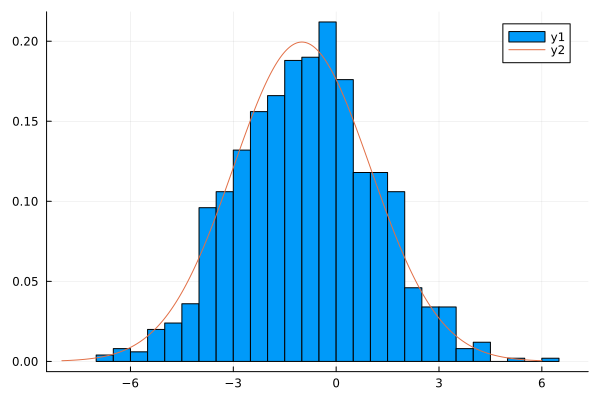

In [7]:

x=-8:0.001:6
histogram(data, normalize=true)
plot!(x,gauss)
